# Obtaining Statistical Threshold
Code written by Camila Cusicanqui

The following code is written to obtain the statistical threshold for the closing price difference for the S&P 500 financial market index. This threshold will be utilized for calculating the reward in ´environment.py´.

We are going to be fitting distributions of the following financial indicator:
* Closing price difference

First, we want to plot the distribution plot of df['Difference].

In [1]:
# Author: @cami_cusi 
# Gym stuff
import gymnasium as gym

# Stable baselines
from stable_baselines3 import A2C

# Other libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def difference(
        df:pd.DataFrame
):
    df['Difference'] = df['Close'].diff()
    return df


In [3]:
df = pd.read_csv('data_sp.csv')

In [4]:
df = difference(df)

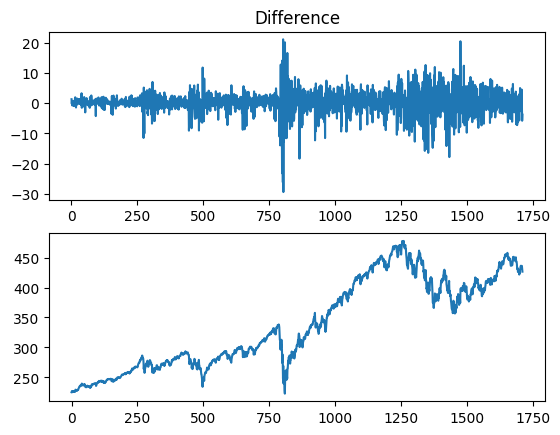

In [5]:
plt.subplot(2,1,1)
plt.plot(df['Difference'])
plt.title('Difference')
plt.subplot(2,1,2)
plt.plot(df['Close'])

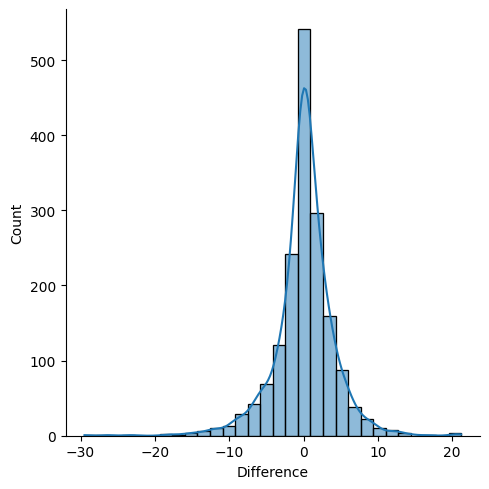

In [6]:
import seaborn as sns
sns.displot(df['Difference'], kde=True, bins=30)

We are going to assume that our S&P 500 financial index distribution is parametric.

In [7]:
from distfit import distfit

In [8]:
dfit = distfit(method = 'parametric', todf = True)
dfit.fit_transform(df['Difference'].dropna(axis=0))

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0314995] [loc=0.118 scale=4.028]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.163846] [loc=-29.470 scale=29.588]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.163846] [loc=-8589934621.470 scale=8589934592.000]
[distfit] >INFO> [dweibull  ] [0.15 sec] [RSS: 0.00165856] [loc=0.140 scale=2.483]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.00661189] [loc=0.278 scale=2.223]
[distfit] >INFO> [genextreme] [0.44 sec] [RSS: 0.0479211] [loc=-1.505 scale=4.724]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 0.0342288] [loc=-71.764 scale=0.242]
[distfit] >INFO> [lognorm   ] [0.22 sec] [RSS: 0.0317963] [loc=-135.183 scale=135.246]
[distfit] >INFO> [beta      ] [0.18 sec] [RSS: 0.0308771] [loc=-800.326 scale=862.759]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.144581] [loc=-29.470 scale=50.680]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.0305454] [loc=-84.424 scale=23.743]


{'model': {'name': 'dweibull',
  'score': 0.0016585584488392562,
  'loc': 0.13998413085937506,
  'scale': 2.483331571291063,
  'arg': (0.8897125015042786,),
  'params': (0.8897125015042786, 0.13998413085937506, 2.483331571291063),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x250b486b4f0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -6.200904728118142,
  'CII_max_alpha': 6.4808729898368895},
 'summary':           name     score                loc              scale  \
 0     dweibull  0.001659           0.139984           2.483332   
 1            t  0.006612           0.278155           2.223417   
 2     loggamma  0.030545         -84.423698          23.742707   
 3         beta  0.030877        -800.326478         862.759004   
 4         norm  0.031499           0.117655           4.028141   
 5      lognorm  0.031796        -135.183235         135.245801   
 6        gamma  0.034229         -71.764168        

In [9]:
dfit.model

{'name': 'dweibull',
 'score': 0.0016585584488392562,
 'loc': 0.13998413085937506,
 'scale': 2.483331571291063,
 'arg': (0.8897125015042786,),
 'params': (0.8897125015042786, 0.13998413085937506, 2.483331571291063),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x250b486b4f0>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -6.200904728118142,
 'CII_max_alpha': 6.4808729898368895}

In [10]:
models = dfit.summary
models

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,dweibull,0.001659,0.139984,2.483332,"(0.8897125015042786,)","(0.8897125015042786, 0.13998413085937506, 2.48...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
1,t,0.006612,0.278155,2.223417,"(2.3095045675652828,)","(2.3095045675652828, 0.27815498589714516, 2.22...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#e41a1c
2,loggamma,0.030545,-84.423698,23.742707,"(35.687666839542985,)","(35.687666839542985, -84.42369793225508, 23.74...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#377eb8
3,beta,0.030877,-800.326478,862.759004,"(2878.144596261801, 224.06500185334335)","(2878.144596261801, 224.06500185334335, -800.3...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#4daf4a
4,norm,0.031499,0.117655,4.028141,(),"(0.11765496326468843, 4.02814085408179)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#984ea3
5,lognorm,0.031796,-135.183235,135.245801,"(0.029718756474228447,)","(0.029718756474228447, -135.18323452834937, 13...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ff7f00
6,gamma,0.034229,-71.764168,0.24226,"(296.7810726783672,)","(296.7810726783672, -71.76416819010655, 0.2422...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#ffff33
7,genextreme,0.047921,-1.505164,4.723581,"(0.2033119454575257,)","(0.2033119454575257, -1.5051637217432845, 4.72...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#a65628
8,uniform,0.144581,-29.470001,50.680008,(),"(-29.470001220703153, 50.68000793457031)",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#f781bf
9,pareto,0.163846,-8589934621.470001,8589934591.999999,"(290321563.6161988,)","(290321563.6161988, -8589934621.470001, 858993...",<scipy.stats._distn_infrastructure.rv_continuo...,0,None,#999999


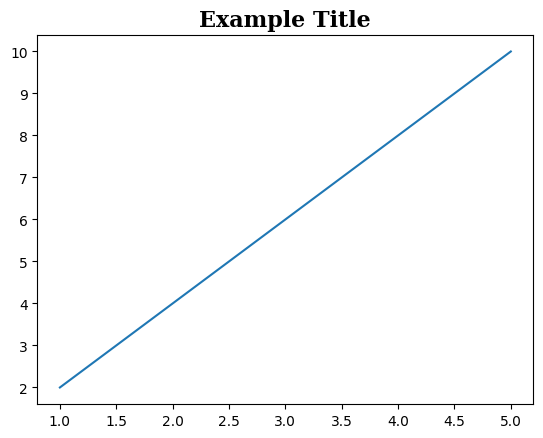

In [11]:
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Plotting the data
plt.plot(x, y)

# Changing the font of the title
title_font = {'family': 'serif', 'weight': 'bold', 'size': 16}
plt.title('Example Title', fontdict=title_font)

# Display the plot
plt.show()


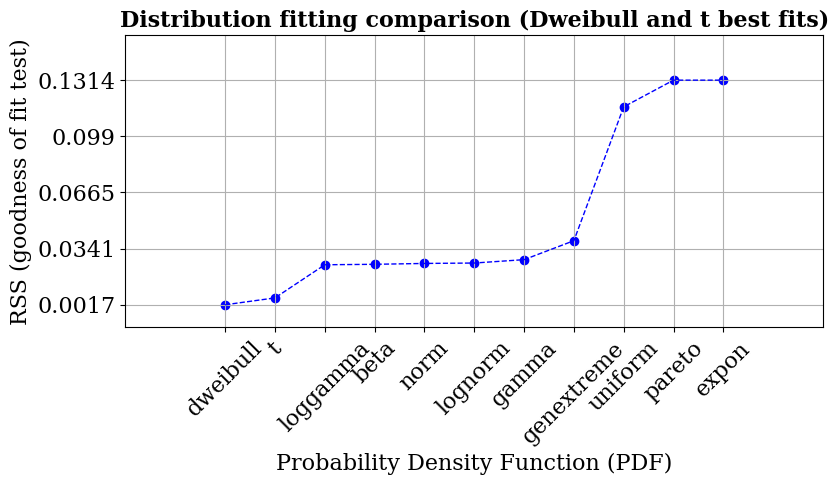

In [105]:
ax = dfit.plot_summary(
    figsize = (9,4),
    title = 'Distribution fitting comparison (Dweibull and t best fits)',
)
title_font = {'family': 'serif', 'weight': 'bold', 'size': 16}
label_font = {'family': 'serif', 'size': 16}
plt.title('Distribution fitting comparison (Dweibull and t best fits)', fontdict=title_font)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size']=16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize']=9,4
#plt.xlabel(ax[1].get_xlabel(),fontdict=label_font)
#plt.ylabel(ax[1].get_ylabel(), fontdict=label_font)

In the analysis of closing price differences, our methodology revealed that the Weibull distribution, as indicated by the Residual Sum of Squares (RSS), is the most suitable fit. This distribution's adaptability, particularly due to its shape parameter, makes it proficient in modeling data with varied forms and effectively handling heavy-tailed distributions. However, the t-Student distribution, which closely follows in RSS score, is the industry standard for modeling financial market fluctuations due to its capacity to accommodate outliers and extreme value variations.[1] For this reason, we will utilize the t-Student distribution for all future parametric distribution fits.

[1] Dongming Zhu, John W. Galbraith, A generalized asymmetric Student-t distribution with application to financial econometrics,
Journal of Econometrics, 2010
[2] Mika Meitz, Pentti Saikkonen. A mixture autoregressive model based on Student’s t–distribution.
Communications in Statistics: Case Studies, Data Analysis and Applications, 2021


(None,
 <Axes: title={'center': '\ndweibull(c=0.889713, loc=0.139984, scale=2.48333)'}, xlabel='Values', ylabel='Frequency'>)

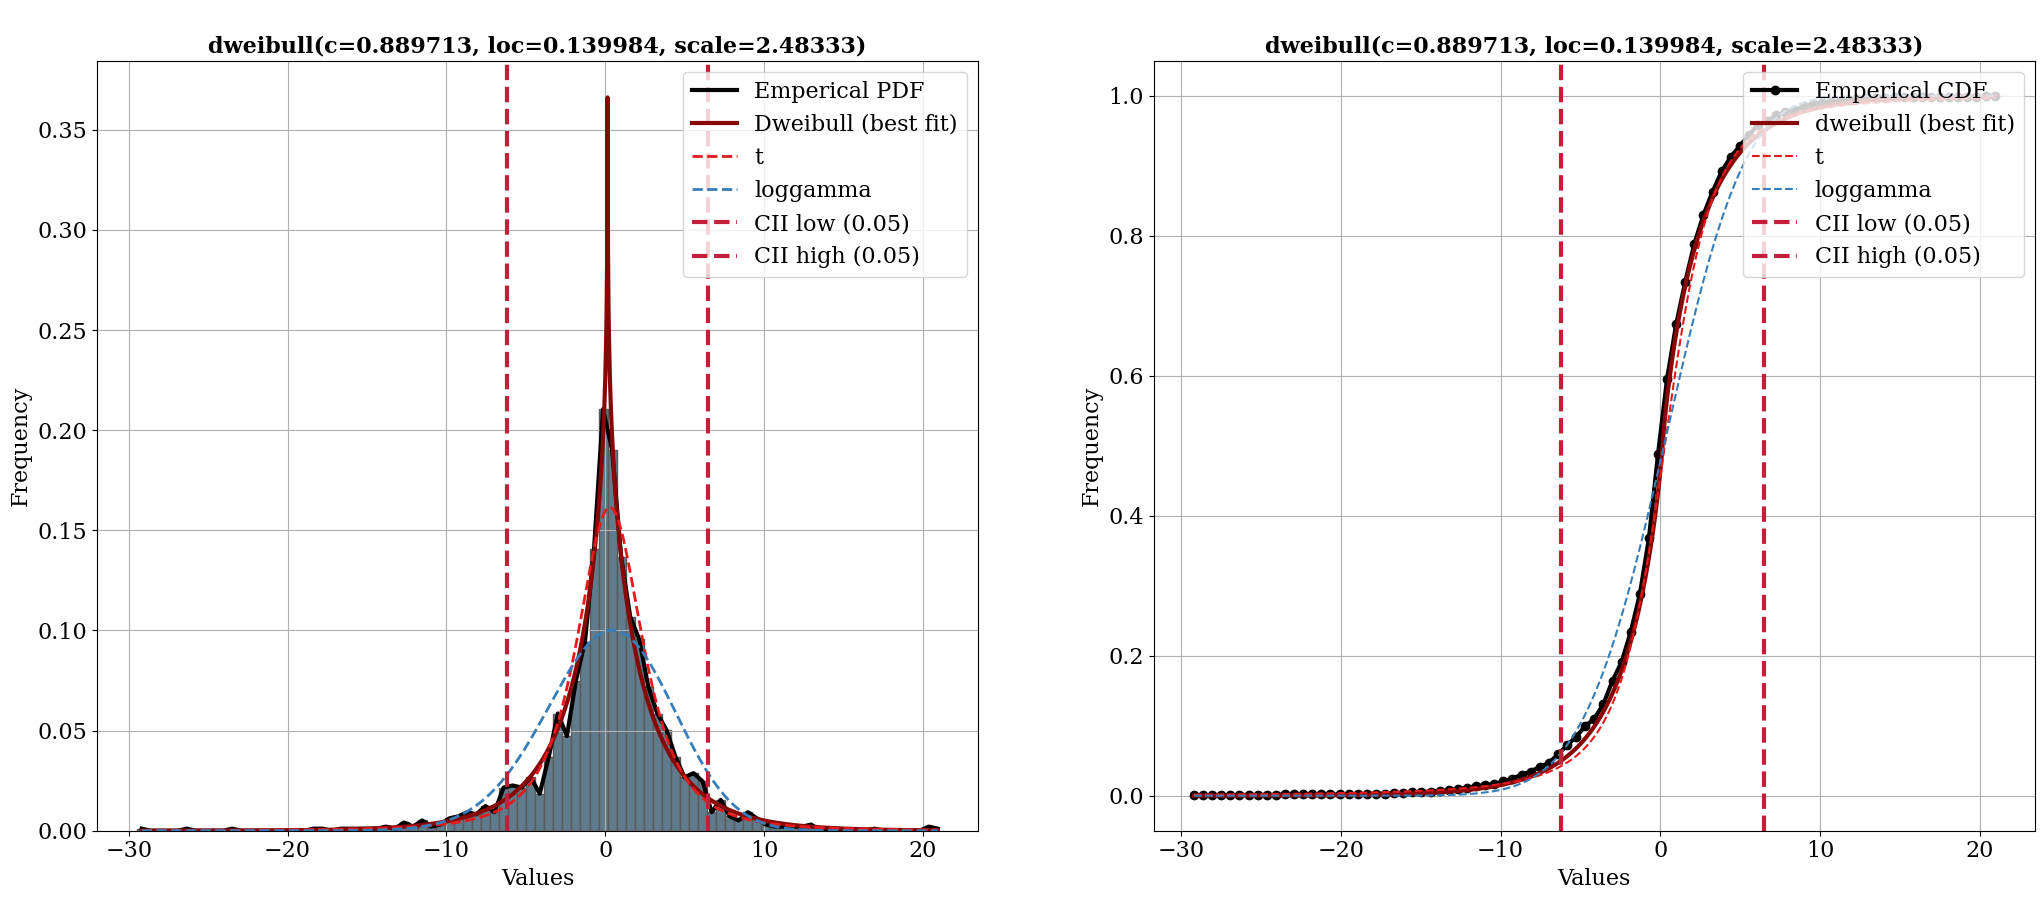

In [61]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=2, ax=ax[1])

(None,
 <Axes: title={'center': 'QQ-plot\ndweibull(c=0.889713, loc=0.139984, scale=2.48333)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

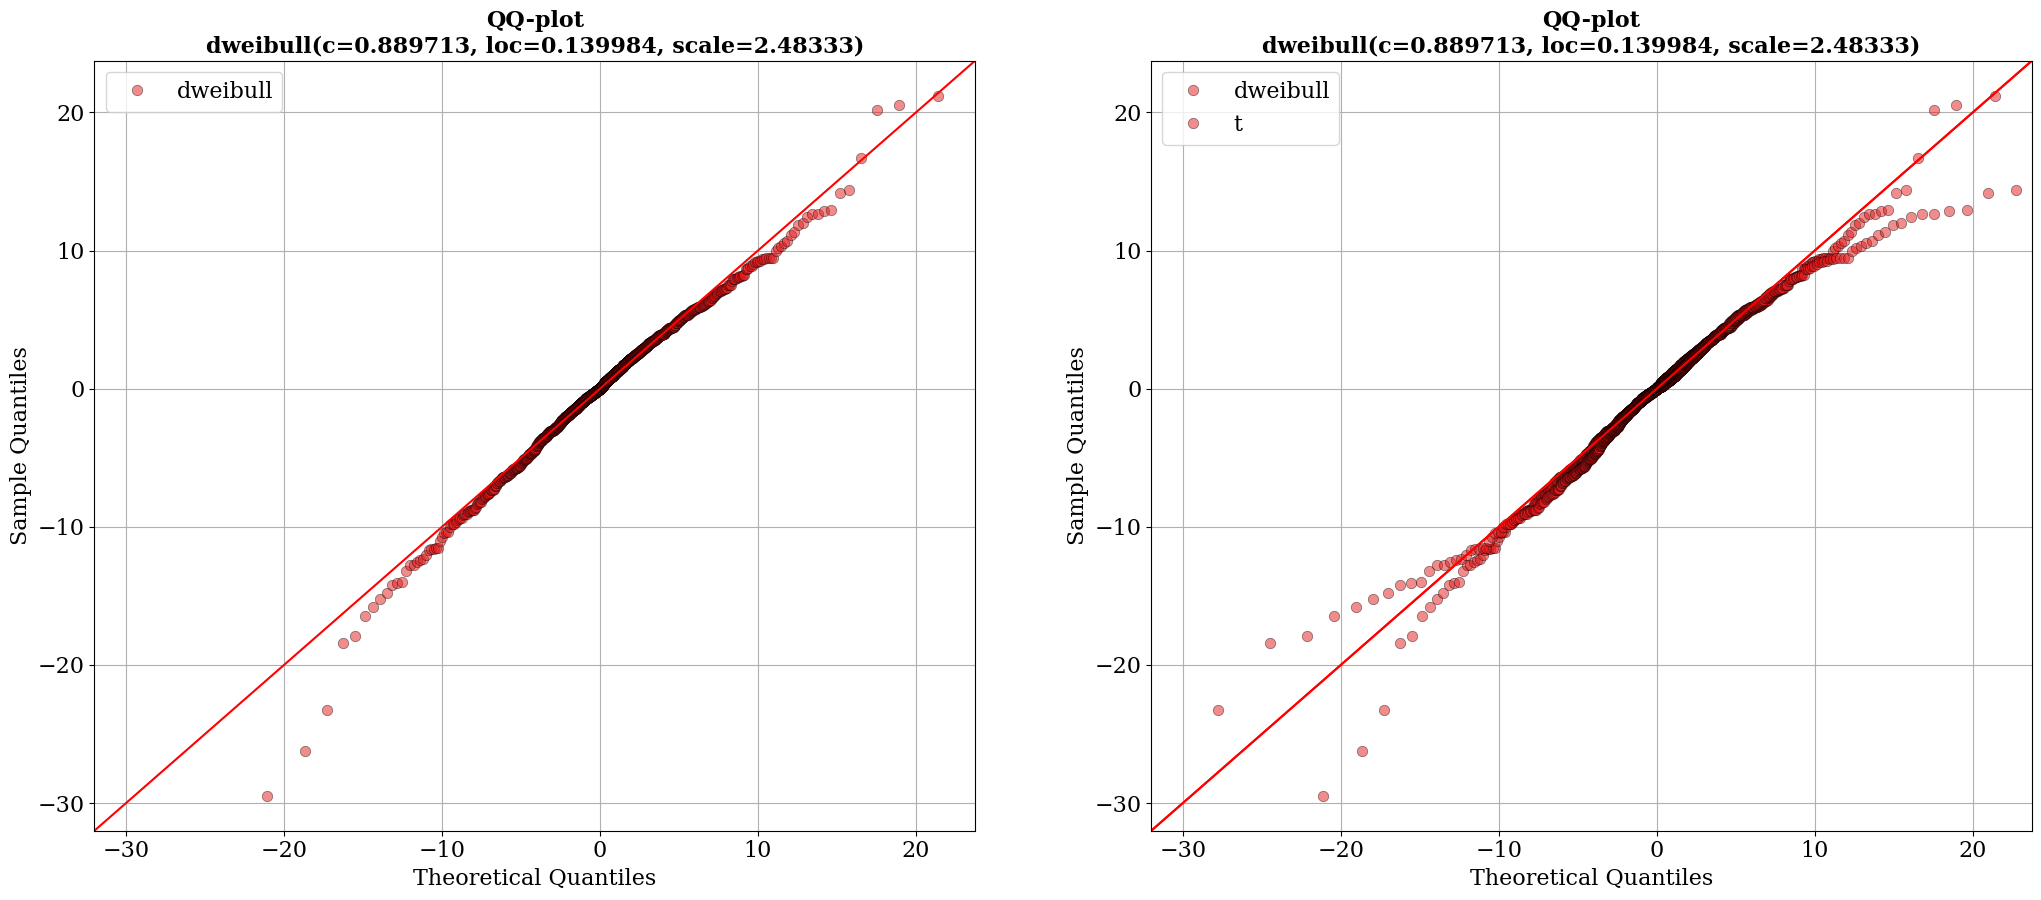

In [62]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot left panel with best fitting distribution.
dfit.qqplot(df['Difference'].dropna(), ax=ax[0])
# plot right panel with all fitted theoretical distributions
dfit.qqplot(df['Difference'].dropna(), n_top=2, ax=ax[1])

In [102]:
from scipy.stats import t
def plot_tdist(
        dof: float,
        loc: float,
        scale: float,
        data:pd.Series
):
    x = np.linspace(min(data), max(data), 1000)
    y = t.pdf(x, dof, loc, scale)
    plt.hist(data, bins=30, density=True, alpha=0.5, color = 'blue', label='Data Histogram')
    plt.plot(x, y, color = 'black', label='Fitted t-Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('t-Distribution Fit to Data')


In [103]:
from scipy.stats import t
def tStudent_fit(
        df:pd.Series,
        override_plot = False,
        
):
    dof, loc, scale = t.fit(df )
    if override_plot == True:
        plot_tdist(dof,loc,scale,df)
    mpv = 0.5
    threshold = t.ppf(mpv, dof, loc, scale)
    return threshold

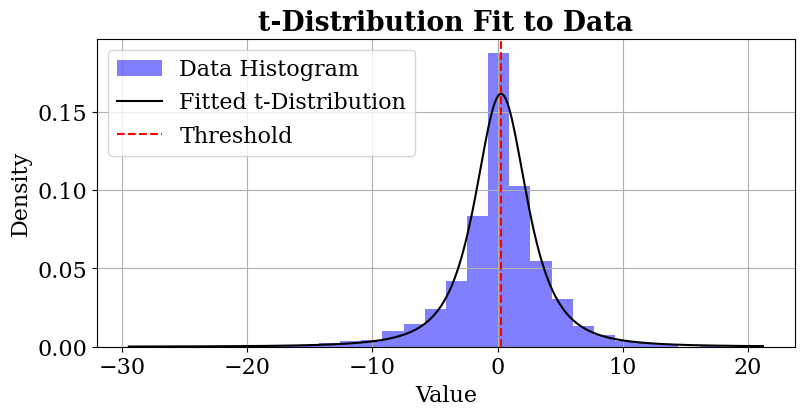

The threshold is: 0.2781549858971453


In [104]:
threshold = tStudent_fit(df['Difference'].dropna(), override_plot=True, )
plt.axvline(x = threshold, color = 'r',linestyle = '--',label = 'Threshold')
plt.legend()
plt.show()
print(f'The threshold is: {threshold}')